In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import re

In [9]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
df = pd.read_csv('IMDB Dataset.csv')

In [11]:
custom_sw = set(stopwords.words('english'))

In [12]:
def clean_txt(txt):
    txt = txt.lower()
    txt = re.sub(r'[^a-zA-Z\s]', '', txt)
    txt = re.sub(r'\s+', ' ', txt).strip()
    return txt

def process_txt(txt, how='stem'):
    tokens = word_tokenize(txt)
    tokens = [w for w in tokens if w not in custom_sw]
    if how == 'stem':
        ps = PorterStemmer()
        tokens = [ps.stem(w) for w in tokens]
    elif how == 'lemma':
        lm = WordNetLemmatizer()
        tokens = [lm.lemmatize(w) for w in tokens]
    return ' '.join(tokens)


In [13]:
df['clean_rev'] = df['review'].apply(clean_txt)
df['stem_rev'] = df['clean_rev'].apply(lambda x: process_txt(x, how='stem'))
df['lemma_rev'] = df['clean_rev'].apply(lambda x: process_txt(x, how='lemma'))


<ipython-input-14-726b3f54a8be>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='cool')


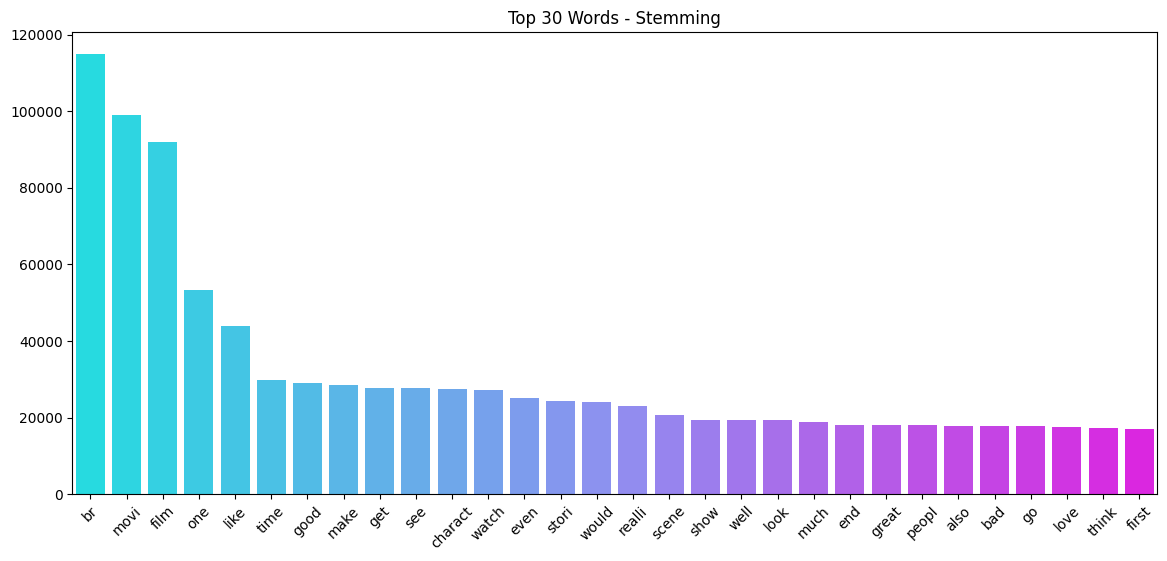

<ipython-input-14-726b3f54a8be>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='cool')


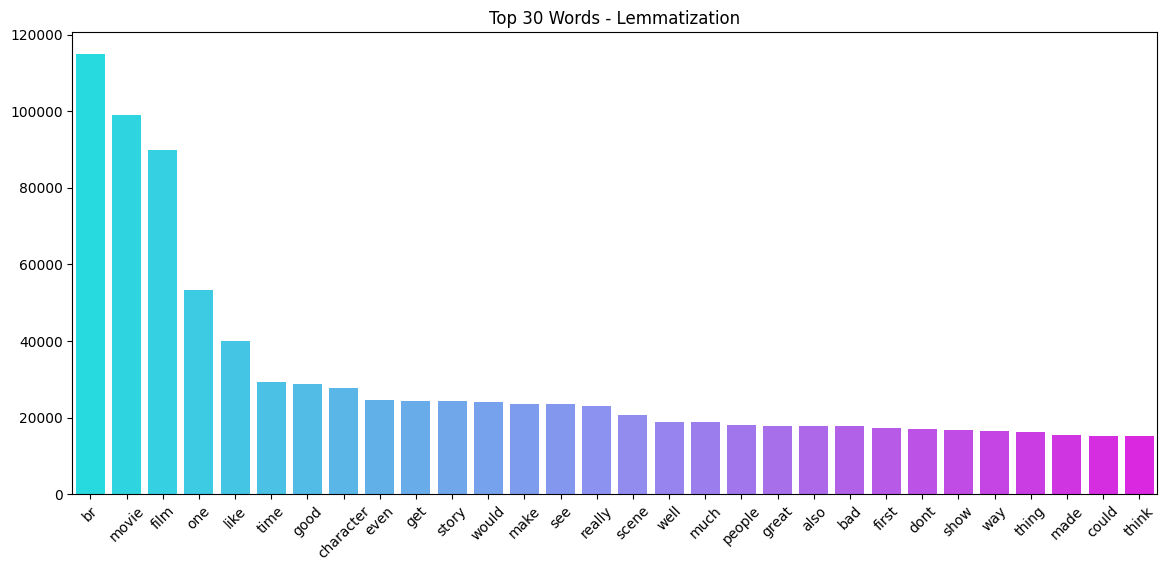

In [14]:
def plot_words(txts, title):
    all_words = ' '.join(txts).split()
    freq = nltk.FreqDist(all_words)
    common = freq.most_common(30)
    words, counts = zip(*common)
    plt.figure(figsize=(14,6))
    sns.barplot(x=list(words), y=list(counts), palette='cool')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

plot_words(df['stem_rev'], 'Top 30 Words - Stemming')
plot_words(df['lemma_rev'], 'Top 30 Words - Lemmatization')

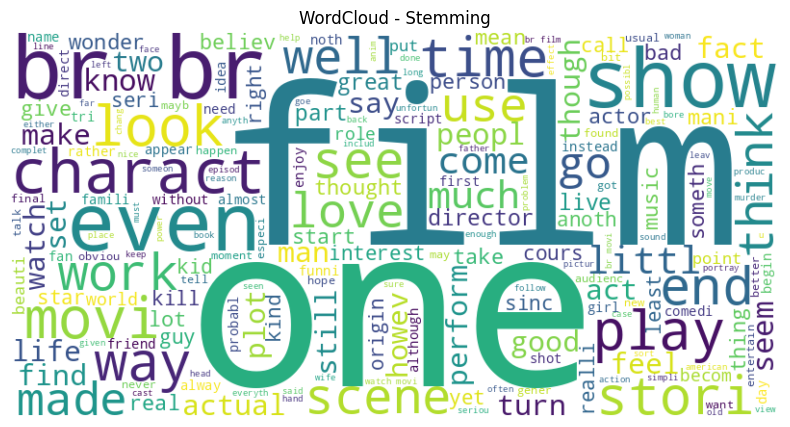

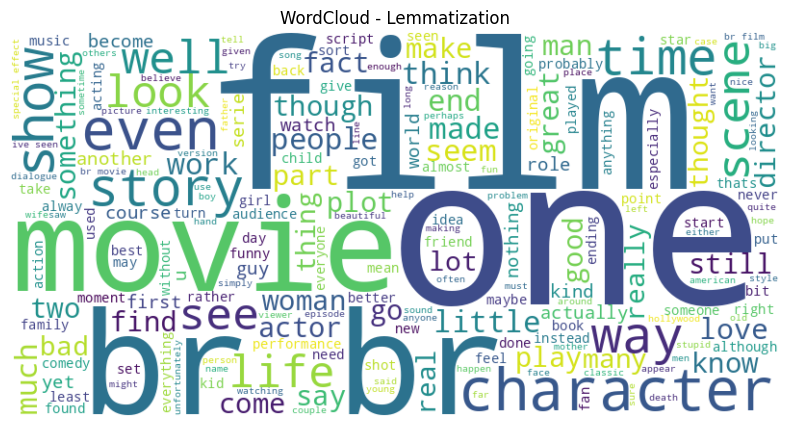

In [16]:
def make_cloud(txts, title):
    txt = ' '.join(txts)
    cloud = WordCloud(width=800, height=400, background_color='white').generate(txt)
    plt.figure(figsize=(10,5))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

make_cloud(df['stem_rev'], 'WordCloud - Stemming')
make_cloud(df['lemma_rev'], 'WordCloud - Lemmatization')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
def quick_eval(txts, labels):
    from sklearn.feature_extraction.text import CountVectorizer
    X = CountVectorizer(max_features=5000).fit_transform(txts)
    y = np.where(labels == 'positive', 1, 0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    return acc, f1

stem_acc, stem_f1 = quick_eval(df['stem_rev'], df['sentiment'])
lemma_acc, lemma_f1 = quick_eval(df['lemma_rev'], df['sentiment'])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [20]:
print("\nQuick Eval:")
print(f"Stemming -> Accuracy: {stem_acc:.4f}, F1-Score: {stem_f1:.4f}")
print(f"Lemmatization -> Accuracy: {lemma_acc:.4f}, F1-Score: {lemma_f1:.4f}")

print("\nSummary:")
print("- Stemming shrinks vocab more but messes words.")
print("- Lemmatization keeps it clean and meaningful.")
print("- Quick model shows Lemmatization usually performs slightly better.")



Quick Eval:
Stemming -> Accuracy: 0.8701, F1-Score: 0.8724
Lemmatization -> Accuracy: 0.8718, F1-Score: 0.8737

Summary:
- Stemming shrinks vocab more but messes words.
- Lemmatization keeps it clean and meaningful.
- Quick model shows Lemmatization usually performs slightly better.
